<a href="https://colab.research.google.com/github/vinitgela/gen-ai-meetup-pune/blob/main/AGENTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIMPLE AI AGENT

In [1]:
!pip install -U langchain-community langgraph langchain-anthropic tavily-python langgraph-checkpoint-sqlite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 659.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.6/87.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.5/891.5 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.9/393.9 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.1/149.1 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141

In [8]:
import getpass
import os

os.environ["TAVILY_API_KEY"] = ""

In [9]:
from langchain_community.tools.tavily_search import TavilySearchResults

search = TavilySearchResults(max_results=2)
search_results = search.invoke("what is the weather in SF")
print(search_results)
# If we want, we can create other tools.
# Once we have all the tools we want, we can put them in a list that we will reference later.
tools = [search]

[{'url': 'https://www.weatherapi.com/', 'content': "{'location': {'name': 'San Francisco', 'region': 'California', 'country': 'United States of America', 'lat': 37.78, 'lon': -122.42, 'tz_id': 'America/Los_Angeles', 'localtime_epoch': 1724466595, 'localtime': '2024-08-23 19:29'}, 'current': {'last_updated_epoch': 1724465700, 'last_updated': '2024-08-23 19:15', 'temp_c': 20.6, 'temp_f': 69.1, 'is_day': 1, 'condition': {'text': 'Partly cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/day/116.png', 'code': 1003}, 'wind_mph': 15.0, 'wind_kph': 24.1, 'wind_degree': 280, 'wind_dir': 'W', 'pressure_mb': 1016.0, 'pressure_in': 30.0, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 61, 'cloud': 50, 'feelslike_c': 20.6, 'feelslike_f': 69.1, 'windchill_c': 16.0, 'windchill_f': 60.8, 'heatindex_c': 16.0, 'heatindex_f': 60.8, 'dewpoint_c': 11.5, 'dewpoint_f': 52.7, 'vis_km': 16.0, 'vis_miles': 9.0, 'uv': 5.0, 'gust_mph': 19.5, 'gust_kph': 31.3}}"}, {'url': 'https://www.almanac.com/weather/longra

In [3]:
!pip install -qU langchain-openai


In [11]:
import getpass
import os

os.environ["OPENAI_API_KEY"] = ""

from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="gpt-4")

In [12]:
from langchain_core.messages import HumanMessage

response = model.invoke([HumanMessage(content="hi!")])
response.content

'Hello! How can I assist you today?'

In [13]:
model_with_tools = model.bind_tools(tools)

In [14]:
response = model_with_tools.invoke([HumanMessage(content="Hi!")])

print(f"ContentString: {response.content}")
print(f"ToolCalls: {response.tool_calls}")

ContentString: Hello! How can I assist you today?
ToolCalls: []


In [15]:
response = model_with_tools.invoke([HumanMessage(content="What's the weather in SF?")])

print(f"ContentString: {response.content}")
print(f"ToolCalls: {response.tool_calls}")

ContentString: 
ToolCalls: [{'name': 'tavily_search_results_json', 'args': {'query': 'current weather in San Francisco'}, 'id': 'call_k60YzVMUBL29Qu2Gya6ZnSwO', 'type': 'tool_call'}]


In [16]:
from langgraph.prebuilt import create_react_agent

agent_executor = create_react_agent(model, tools)

In [17]:
response = agent_executor.invoke({"messages": [HumanMessage(content="hi!")]})

response["messages"]

[HumanMessage(content='hi!', id='68afd0a5-0679-4a23-8254-d0d266b938b9'),
 AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 83, 'total_tokens': 93}, 'model_name': 'gpt-4-0613', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-6f98db1b-c7d0-47d5-b1f9-79478f7a65b7-0', usage_metadata={'input_tokens': 83, 'output_tokens': 10, 'total_tokens': 93})]

In [18]:
response = agent_executor.invoke({"messages": [HumanMessage(content="WHAT IS THE WEATHER IN PUNE!")]})
response["messages"]

[HumanMessage(content='WHAT IS THE WEATHER IN PUNE!', id='2ad66128-2fe8-463e-a8be-8b0d8d8c89fc'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_qId4ihu7GG0XCzHJEQfoVy3A', 'function': {'arguments': '{\n  "query": "current weather in Pune"\n}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 90, 'total_tokens': 112}, 'model_name': 'gpt-4-0613', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-fdc42251-fc0b-4086-a775-7da5647ac0eb-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'current weather in Pune'}, 'id': 'call_qId4ihu7GG0XCzHJEQfoVy3A', 'type': 'tool_call'}], usage_metadata={'input_tokens': 90, 'output_tokens': 22, 'total_tokens': 112}),
 ToolMessage(content='[{"url": "https://www.weatherapi.com/", "content": "{\'location\': {\'name\': \'Pune\', \'region\': \'Maharashtra\', \'country\': \'Ind

In [18]:
## ADDING MEMORY

In [19]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

In [20]:
agent_executor = create_react_agent(model, tools, checkpointer=memory)

config = {"configurable": {"thread_id": "123"}}


for chunk in agent_executor.stream(
    {"messages": [HumanMessage(content="hi im bob!")]}, config
):
    print(chunk)
    print("----")

{'agent': {'messages': [AIMessage(content='Hello Bob! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 85, 'total_tokens': 96}, 'model_name': 'gpt-4-0613', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-c812e658-ba3d-499c-bd3c-a9cd7261636e-0', usage_metadata={'input_tokens': 85, 'output_tokens': 11, 'total_tokens': 96})]}}
----


In [21]:
for chunk in agent_executor.stream(
    {"messages": [HumanMessage(content="whats my name?")]}, config
):
    print(chunk)
    print("----")

{'agent': {'messages': [AIMessage(content='Your name is Bob. Is there anything else you need help with?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 108, 'total_tokens': 123}, 'model_name': 'gpt-4-0613', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-ea0ced29-3330-4d93-9a91-a6ab232023dc-0', usage_metadata={'input_tokens': 108, 'output_tokens': 15, 'total_tokens': 123})]}}
----


# MULTI-AGENT

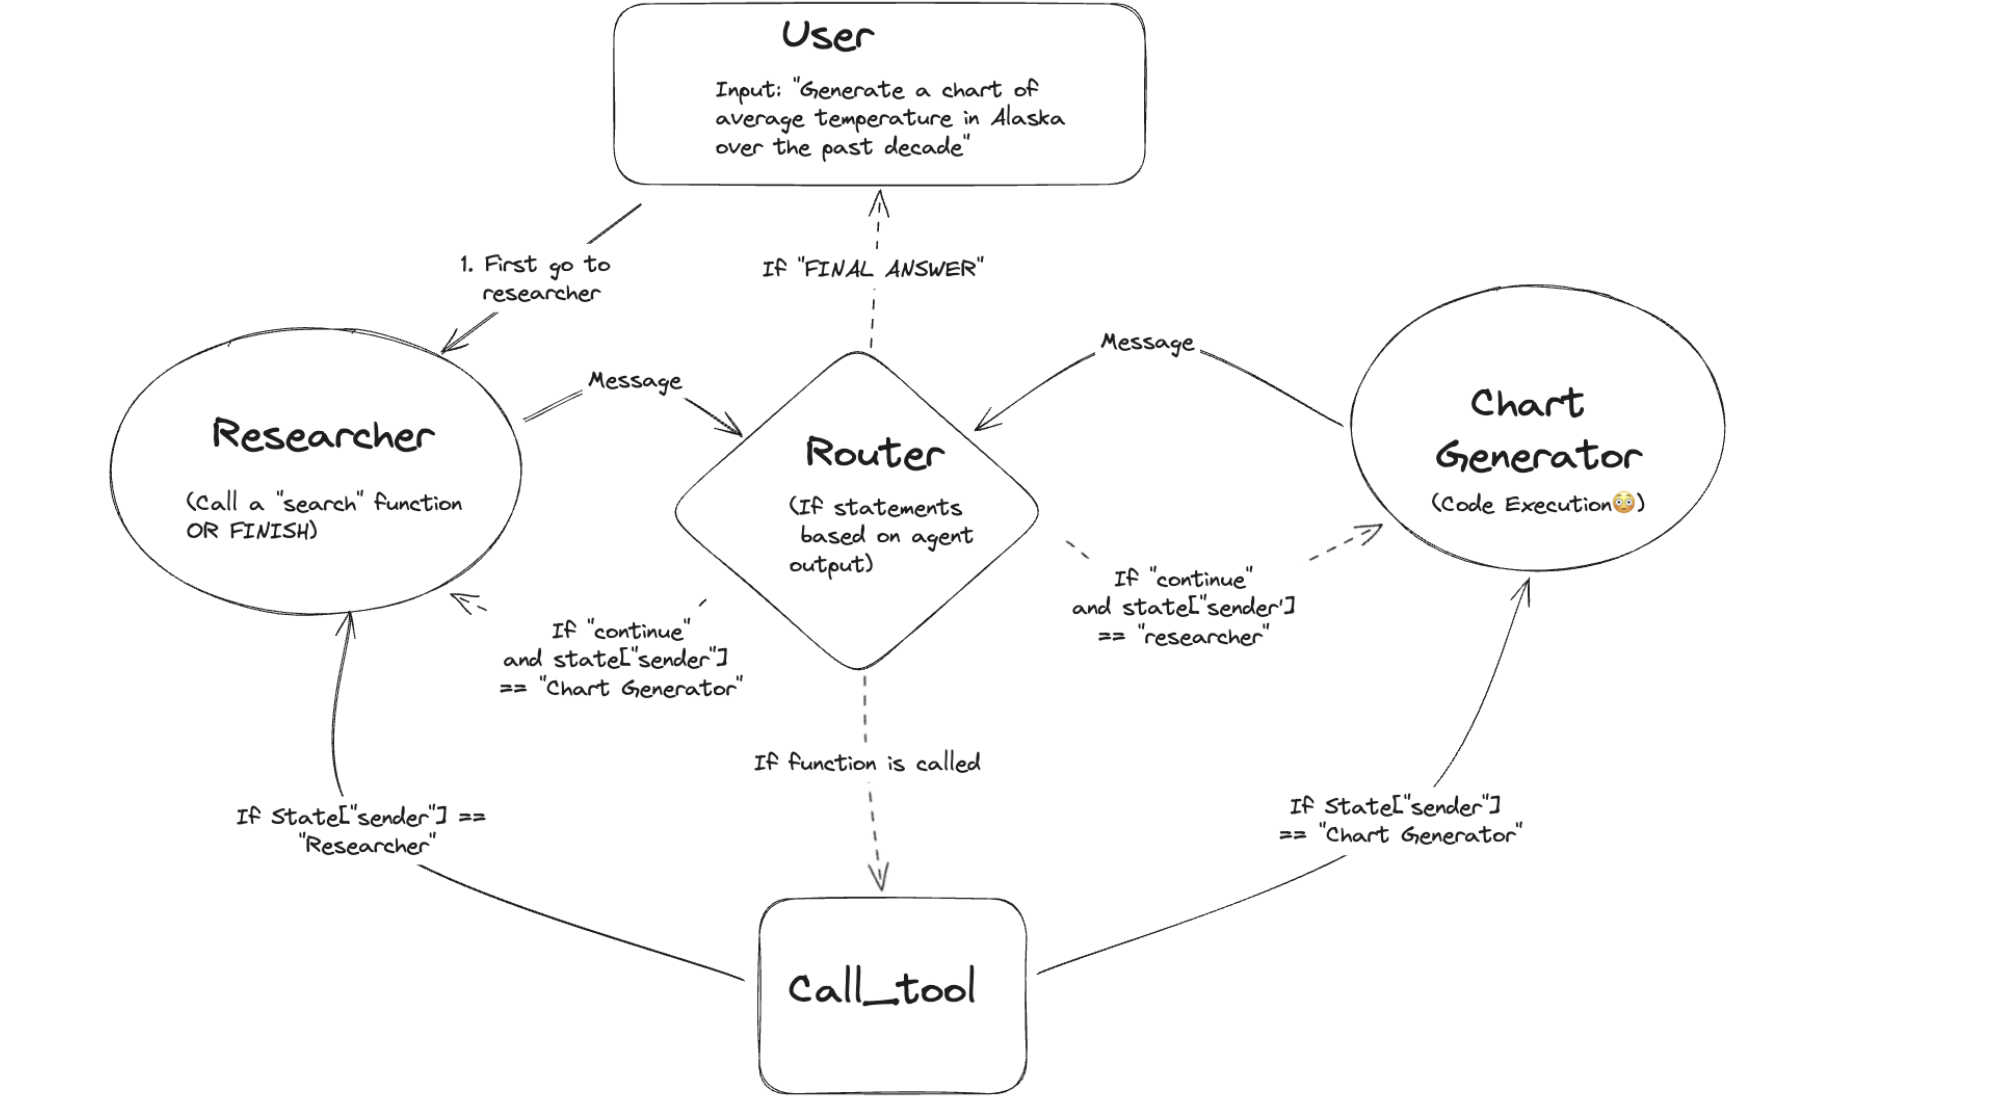

In [27]:
#!pip install -U langchain langchain_openai langsmith pandas langchain_experimental matplotlib langgraph langchain_core



##agent creation *function*


In [22]:
from langchain_core.messages import (
    BaseMessage,
    HumanMessage,
    ToolMessage,
)
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

from langgraph.graph import END, StateGraph, START


def create_agent(llm, tools, system_message: str):
    """Create an agent."""
    prompt = ChatPromptTemplate.from_messages(
        [
            (
                "system",
                "You are a helpful AI assistant, collaborating with other assistants."
                " Use the provided tools to progress towards answering the question."
                " If you are unable to fully answer, that's OK, another assistant with different tools "
                " will help where you left off. Execute what you can to make progress."
                " If you or any of the other assistants have the final answer or deliverable,"
                " prefix your response with FINAL ANSWER so the team knows to stop."
                " You have access to the following tools: {tool_names}.\n{system_message}",
            ),
            MessagesPlaceholder(variable_name="messages"),
        ]
    )
    prompt = prompt.partial(system_message=system_message)
    prompt = prompt.partial(tool_names=", ".join([tool.name for tool in tools]))
    return prompt | llm.bind_tools(tools)

## tools

In [23]:
from typing import Annotated

from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.tools import tool
from langchain_experimental.utilities import PythonREPL

tavily_tool = TavilySearchResults(max_results=5)

# Warning: This executes code locally, which can be unsafe when not sandboxed

repl = PythonREPL()


@tool
def python_repl(
    code: Annotated[str, "The python code to execute to generate your chart."],
):
    """Use this to execute python code. If you want to see the output of a value,
    you should print it out with `print(...)`. This is visible to the user."""
    try:
        result = repl.run(code)
    except BaseException as e:
        return f"Failed to execute. Error: {repr(e)}"
    result_str = f"Successfully executed:\n```python\n{code}\n```\nStdout: {result}"
    return (
        result_str + "\n\nIf you have completed all tasks, respond with FINAL ANSWER.")

## create an agent state

In [24]:
import operator
from typing import Annotated, Sequence, TypedDict

from langchain_openai import ChatOpenAI


# This defines the object that is passed between each node
# in the graph. We will create different nodes for each agent and tool
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]
    sender: str

## define tools

In [25]:
import functools

from langchain_core.messages import AIMessage


# Helper function to create a node for a given agent
def agent_node(state, agent, name):
    result = agent.invoke(state)
    # We convert the agent output into a format that is suitable to append to the global state
    if isinstance(result, ToolMessage):
        pass
    else:
        result = AIMessage(**result.dict(exclude={"type", "name"}), name=name)
    return {
        "messages": [result],
        # Since we have a strict workflow, we can
        # track the sender so we know who to pass to next.
        "sender": name,
    }


llm = ChatOpenAI(model="gpt-4o-mini")

# Research agent and node
research_agent = create_agent(
    llm,
    [tavily_tool],
    system_message="You should provide accurate data for the chart_generator to use.",
)
research_node = functools.partial(agent_node, agent=research_agent, name="Researcher")

# chart_generator
chart_agent = create_agent(
    llm,
    [python_repl],
    system_message="Any charts you display will be visible by the user.",
)
chart_node = functools.partial(agent_node, agent=chart_agent, name="chart_generator")


from langgraph.prebuilt import ToolNode

tools = [tavily_tool, python_repl]
tool_node = ToolNode(tools)


## conditional edge logic

In [26]:
# Either agent can decide to end
from typing import Literal


def router(state) -> Literal["call_tool", "__end__", "continue"]:
    # This is the router
    messages = state["messages"]
    last_message = messages[-1]
    if last_message.tool_calls:
        # The previous agent is invoking a tool
        return "call_tool"
    if "FINAL ANSWER" in last_message.content:
        # Any agent decided the work is done
        return "__end__"
    return "continue"


## define the graph

In [27]:
workflow = StateGraph(AgentState)

workflow.add_node("Researcher", research_node)
workflow.add_node("chart_generator", chart_node)
workflow.add_node("call_tool", tool_node)

workflow.add_conditional_edges(
    "Researcher",
    router,
    {"continue": "chart_generator", "call_tool": "call_tool", "__end__": END},
)
workflow.add_conditional_edges(
    "chart_generator",
    router,
    {"continue": "Researcher", "call_tool": "call_tool", "__end__": END},
)

workflow.add_conditional_edges(
    "call_tool",
    # Each agent node updates the 'sender' field
    # the tool calling node does not, meaning
    # this edge will route back to the original agent
    # who invoked the tool
    lambda x: x["sender"],
    {
        "Researcher": "Researcher",
        "chart_generator": "chart_generator",
    },
)
workflow.add_edge(START, "Researcher")
graph = workflow.compile()

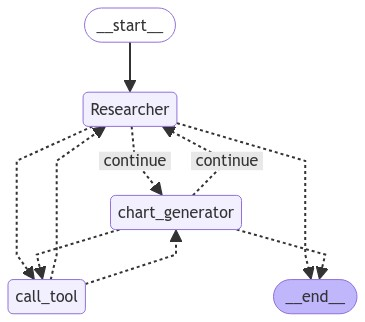

In [28]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass


{'Researcher': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_j7HkP2IDb5H37J19476mCjXu', 'function': {'arguments': '{"query":"India GDP past 5 years"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 204, 'total_tokens': 227}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_48196bc67a', 'finish_reason': 'tool_calls', 'logprobs': None}, name='Researcher', id='run-9c6fb317-dd89-48fd-bc4e-8375e2de383f-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'India GDP past 5 years'}, 'id': 'call_j7HkP2IDb5H37J19476mCjXu', 'type': 'tool_call'}], usage_metadata={'input_tokens': 204, 'output_tokens': 23, 'total_tokens': 227})], 'sender': 'Researcher'}}
----
{'call_tool': {'messages': [ToolMessage(content='[{"url": "https://tradingeconomics.com/india/gdp-growth-annual", "content": "GDP Annual Growth Rate in India ave

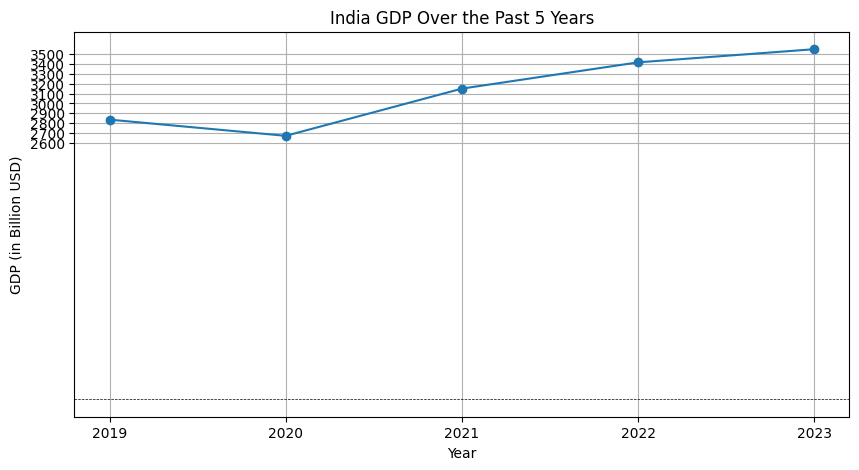

{'call_tool': {'messages': [ToolMessage(content="Successfully executed:\n```python\nimport matplotlib.pyplot as plt\n\n# Data for India's GDP over the past 5 years\nyears = [2019, 2020, 2021, 2022, 2023]\ngdp_values = [2835.61, 2671.60, 3150.31, 3416.65, 3549.92]\n\n# Creating the plot\nplt.figure(figsize=(10, 5))\nplt.plot(years, gdp_values, marker='o')\nplt.title('India GDP Over the Past 5 Years')\nplt.xlabel('Year')\nplt.ylabel('GDP (in Billion USD)')\nplt.grid(True)\nplt.xticks(years)\nplt.yticks(range(2600, 3600, 100))\nplt.axhline(0, color='black',linewidth=0.5, ls='--')\nplt.show()\n```\nStdout: \n\nIf you have completed all tasks, respond with FINAL ANSWER.", name='python_repl', tool_call_id='call_7geCBD9wUbblBXvpTK3d5gK2')]}}
----
{'chart_generator': {'messages': [AIMessage(content="FINAL ANSWER\n\nHere is the chart showing India's GDP over the past five years:\n\n![India GDP Over the Past 5 Years](attachment://plot.png)\n\nThe GDP figures are as follows:\n- **2019**: $2,835.6

In [39]:
events = graph.stream(
    {
        "messages": [
            HumanMessage(
                content="Fetch India's GDP for past 5 years and plot a chart of it"
            )
        ],
    },
    # Maximum number of steps to take in the graph
    {"recursion_limit": 150},
)
for s in events:
    print(s)
    print("----")

# CREW AI

In [42]:
##!pip install crewai crewai-tools

In [68]:
import warnings
warnings.filterwarnings('ignore')
import os

from crewai import Agent, Task, Crew
from crewai_tools import ScrapeWebsiteTool, SerperDevTool
from langchain_openai import ChatOpenAI
from crewai import Crew, Process
from datetime import date, timedelta
from pydantic import BaseModel, ValidationError
import json
from pprint import pprint


# Initialize the tools
search_tool = tavily_tool
scrape_tool = ScrapeWebsiteTool()

In [69]:
rental_coordinator = Agent(
   role="Hotel/Rental Coordinator",
   goal="Identify an appropriate hotel, rental home, or vacation rental.",
   tools=[search_tool, scrape_tool],
   verbose=True,
   backstory=(
     "With a keen sense of space and understanding of vacation logistics, "
     "you excel at finding and securing the perfect vacation rental that fits "
     "the vacation's location, start and end dates, group size, and budget constraints."
    )
)

In [70]:
itinerary_planner = Agent(
   role="Itinerary Planner",
   goal="Create a proposed itinerary including daily excursions and activities.",
   tools=[search_tool, scrape_tool],
   verbose=True,
   backstory=(
     "With a passion for adventure and local culture, you specialize in planning engaging "
     "and budget-friendly itineraries, taking into account the traveler's interests, budget, "
     "and logistics like transportation needs."
    )
)

In [71]:
# Define the Budgeting Agent
budgeting_agent = Agent(
   role="Budgeting Agent",
   goal="Manage the overall budget for the trip, considering the cost of accommodation and daily activities.",
   tools=[search_tool],
   verbose=True,
   backstory=(
     "With a knack for financial planning, you ensure the vacation remains within budget while maximizing value and enjoyment."
   )
)

In [72]:
# Define a Pydantic model for venue details
class RentalDetails(BaseModel):
    name: str
    address: str
    capacity: int
    price_per_night: int
    start_date: date
    end_date: date
    description: str
    amenities: list[str]
    source: str

# Define a Pydantic model for itinerary details
class DayItinerary(BaseModel):
    day: int
    date: date
    activities: list[str]
    location: str
    estimated_cost: int
    need_rental_car: bool

class FullItinerary(BaseModel):
    rental_details: RentalDetails
    daily_itineraries: list[DayItinerary]
    total_estimated_cost: int

# Define the tasks for the venue coordinator agent
hotel_task = Task(
    description="Find a hotel or rental in {vacation_city} "
                "that meets criteria for {vacation_details}, {budget}, {group_size}, {start_date} and {end_date}.",
    expected_output="Details of suitable rental options, including name, address, capacity, price per night, available dates, description, and amenities.",
    human_input=True,
    output_json=RentalDetails,
    output_file="venue_details.json",
    agent=rental_coordinator
)

# Define the tasks for the itinerary planner agent
itinerary_task = Task(
    description="Plan a full itinerary for the trip in {vacation_city}, considering {vacation_details}, {budget}, and {group_size}. Include daily excursions and local activities, specifying if a rental car is needed.",
    expected_output="A detailed itinerary for each day of the trip, including activities, locations, estimated costs, and rental car needs.",
    human_input=True,
    output_json=FullItinerary,
    output_file="itinerary_details.json",
    agent=itinerary_planner
)

# Define the tasks for the budgeting agent
budgeting_task = Task(
    description="Ensure the total cost of the trip, including accommodation and daily activities, stays within the allocated budget of {budget}.",
    expected_output="Adjusted itinerary with budget considerations, including the cost of accommodation and daily activities.",
    human_input=True,
    output_json=FullItinerary,
    output_file="final_itinerary.json",
    agent=budgeting_agent
)


In [73]:
# Example data for kicking off the process
vacation_details = {
    'vacation_city': "Honolulu",
    'vacation_details': "A vacation for an adventurous family of 7 who want to explore the island, see the nature, and experience some good Hawaiian food and culture",
    'start_date': "2024-06-15",
    'end_date': "2024-06-22",
    'group_size': 7,
    'budget': 10000,
}

# Define the crew with the venue coordinator agent, itinerary planner agent, and budgeting agent
vacation_planning_crew = Crew(
    agents=[rental_coordinator, itinerary_planner, budgeting_agent],
    tasks=[hotel_task, itinerary_task, budgeting_task],
    manager_llm=ChatOpenAI(model="gpt-3.5-turbo", temperature=0.7),
    process=Process.hierarchical,
    verbose=True
)

result = vacation_planning_crew.kickoff(inputs=vacation_details)

# Load and print the final itinerary
with open('final_itinerary.json') as f:
    final_itinerary_data = json.load(f)

pprint(final_itinerary_data)

 [2024-08-24 02:16:50][DEBUG]: == Working Agent: Crew Manager
 [2024-08-24 02:16:50][INFO]: == Starting Task: Find a hotel or rental in Honolulu that meets criteria for A vacation for an adventurous family of 7 who want to explore the island, see the nature, and experience some good Hawaiian food and culture, 10000, 7, 2024-06-15 and 2024-06-22.


> Entering new CrewAgentExecutor chain...
I need to delegate the task of finding a suitable hotel or rental in Honolulu for a family of 7 to the Hotel/Rental Coordinator.

Action:
Delegate work to coworker

Action Input:
{
  "task": "Find a hotel or rental in Honolulu that meets criteria for a vacation for an adventurous family of 7",
  "context": "The family wants to explore the island, see the nature, experience Hawaiian food and culture, and the stay should be from 2024-06-15 to 2024-06-22 with a budget of 10000",
  "coworker": "Hotel/Rental Coordinator"
}


> Entering new CrewAgentExecutor chain...
I need to find a hotel or rental in Hono

KeyboardInterrupt: Interrupted by user

##Special agents as part of Crew



In [76]:
from typing import List
from pydantic import BaseModel
from crewai import Agent, Crew
from crewai.tasks.conditional_task import ConditionalTask
from crewai.tasks.task_output import TaskOutput
from crewai.task import Task
from crewai_tools import SerperDevTool

# Define a condition function for the conditional task
# if false task will be skipped, true, then execute task
def is_data_missing(output: TaskOutput) -> bool:
    return len(output.pydantic.events) < 10  # this will skip this task

# Define the agents
data_fetcher_agent = Agent(
    role="Data Fetcher",
    goal="Fetch data online using Serper tool",
    backstory="Backstory 1",
    verbose=True,
    tools=[SerperDevTool()],
)

data_processor_agent = Agent(
    role="Data Processor",
    goal="Process fetched data",
    backstory="Backstory 2",
    verbose=True,
)

summary_generator_agent = Agent(
    role="Summary Generator",
    goal="Generate summary from fetched data",
    backstory="Backstory 3",
    verbose=True,
)

class EventOutput(BaseModel):
    events: List[str]

task1 = Task(
    description="Fetch data about events in San Francisco using Serper tool",
    expected_output="List of 10 things to do in SF this week",
    agent=data_fetcher_agent,
    output_pydantic=EventOutput,
)

conditional_task = ConditionalTask(
    description="""
        Check if data is missing. If we have less than 10 events,
        fetch more events using Serper tool so that
        we have a total of 10 events in SF this week..
        """,
    expected_output="List of 10 Things to do in SF this week",
    condition=is_data_missing,
    agent=data_processor_agent,
)

task3 = Task(
    description="Generate summary of events in San Francisco from fetched data",
    expected_output="summary_generated",
    agent=summary_generator_agent,
)

# Create a crew with the tasks
crew = Crew(
    agents=[data_fetcher_agent, data_processor_agent, summary_generator_agent],
    tasks=[task1, conditional_task, task3],
    verbose=True,
    planning=True  # Enable planning feature
)

# Run the crew
result = crew.kickoff()
print("results", result)

 [2024-08-24 02:21:22][INFO]: Planning the crew execution
 Error parsing JSON: Expecting value: line 1 column 1 (char 0). Attempting to handle partial JSON.
 [2024-08-24 02:21:36][DEBUG]: == Working Agent: Data Fetcher
 [2024-08-24 02:21:36][INFO]: == Starting Task: Fetch data about events in San Francisco using Serper toolTask Number 1: Fetch Data About Events in San Francisco: 1. Agent: Data Fetcher - Goal: Fetch data online using the Serper tool. 2. Preparation: Ensure that the Serper tool is accessible and functioning; Familiarize yourself with the tool's functionalities, especially how to construct an effective search query. 3. Execution: Use the Serper tool to execute a search query. Search Query: 'events in San Francisco this week'; Command: Search the internet(search_query: 'events in San Francisco this week'). Confirm that the tool settings are correct (n_results set to 10). 4. Expected Output: Collect and compile a list of at least 10 events happening in San Francisco this we